Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


Zadanie 25

Za pomocą odpowiednich symulacji zbadać moce ANOVA i testu Kruskala-Wallisa w zależności od
liczebności grup. Rozważyć różne formy postawienia fałszywej hipotezy głównej.
Uzyskane wyniki należy opisać w zależności od:
- liczebności generowanych grup,
- postaci fałszywej hipotezy głównej

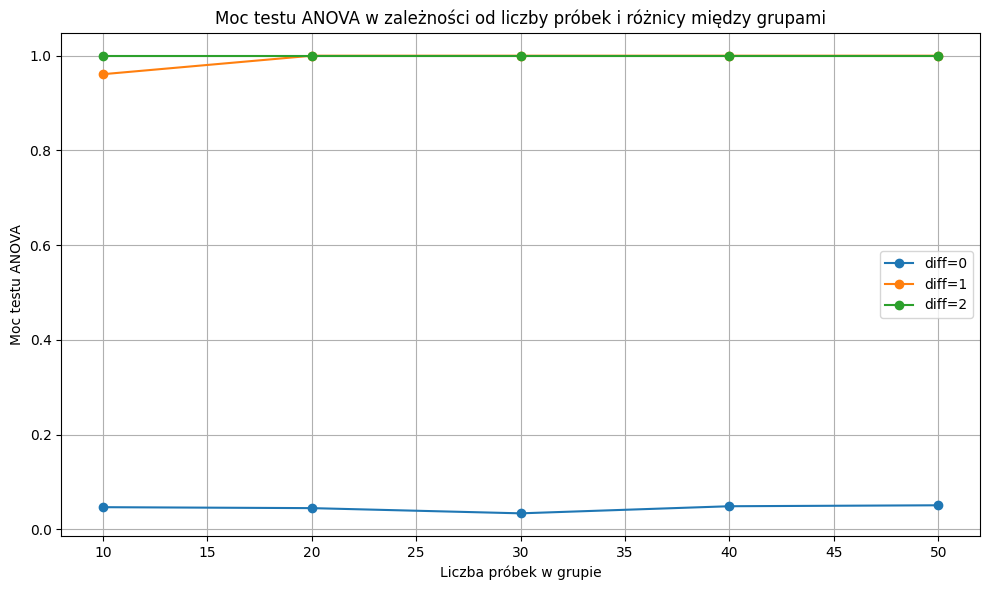

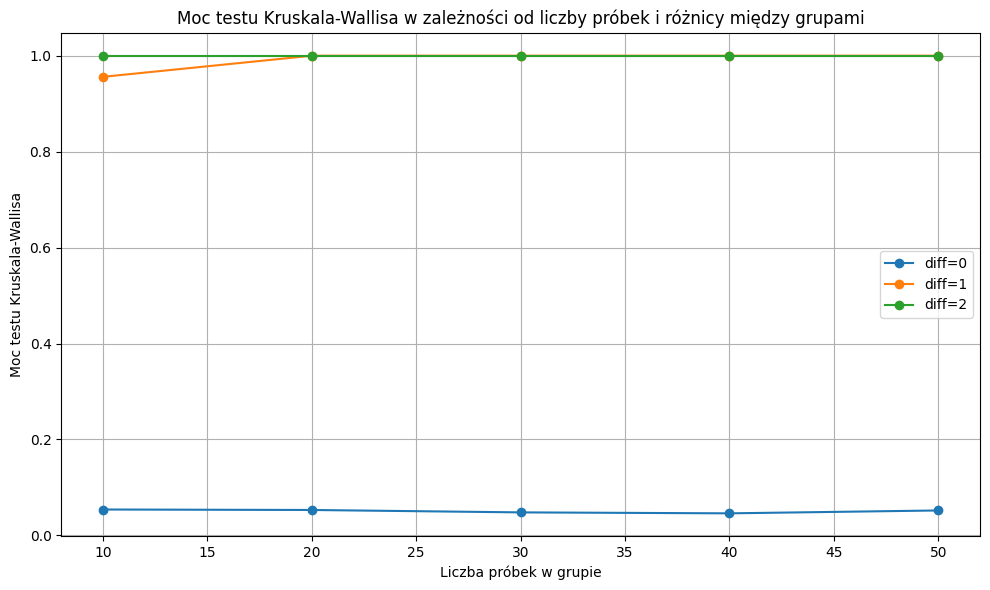

In [2]:
def power_anova(group_sizes, group_diffs, n_simulations=1000):
    anova_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych dla trzech grup o różnych liczebnościach
        samples = []
        for i, size in enumerate(group_sizes):
            samples.append(np.random.normal(0, 1, size=size) + group_diffs[i])

        # Test ANOVA
        _, anova_pvalue = stats.f_oneway(*samples)
        if anova_pvalue < 0.05:
            anova_rejections += 1

    anova_power = anova_rejections / n_simulations

    return anova_power

def power_kruskal(group_sizes, group_diffs, n_simulations=1000):
    kruskal_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych dla trzech grup o różnych liczebnościach
        samples = []
        for i, size in enumerate(group_sizes):
            samples.append(np.random.normal(0, 1, size=size) + group_diffs[i])

        # Test Kruskala-Wallisa
        _, kruskal_pvalue = stats.kruskal(*samples)
        if kruskal_pvalue < 0.05:
            kruskal_rejections += 1

    kruskal_power = kruskal_rejections / n_simulations

    return kruskal_power

# Parametry symulacji
group_sizes_range = [10, 20, 30, 40, 50]
group_diffs_range = [0, 1, 2]

anova_powers = np.zeros((len(group_sizes_range), len(group_diffs_range)))
kruskal_powers = np.zeros((len(group_sizes_range), len(group_diffs_range)))

# Symulacje dla różnych wartości liczebności grup i różnych form postawienia fałszywej hipotezy głównej
for i, group_sizes in enumerate(group_sizes_range):
    for j, group_diffs in enumerate(group_diffs_range):
        anova_power = power_anova([group_sizes] * 3, [0, group_diffs, 2 * group_diffs])
        kruskal_power = power_kruskal([group_sizes] * 3, [0, group_diffs, 2 * group_diffs])
        anova_powers[i, j] = anova_power
        kruskal_powers[i, j] = kruskal_power

# Wykres dla mocy testu ANOVA
plt.figure(figsize=(10, 6))
for j, group_diffs in enumerate(group_diffs_range):
    plt.plot(group_sizes_range, anova_powers[:, j], '-o', label=f'diff={group_diffs}')
plt.xlabel('Liczba próbek w grupie')
plt.ylabel('Moc testu ANOVA')
plt.title('Moc testu ANOVA w zależności od liczby próbek i różnicy między grupami')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres dla mocy testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))
for j, group_diffs in enumerate(group_diffs_range):
    plt.plot(group_sizes_range, kruskal_powers[:, j], '-o', label=f'diff={group_diffs}')
plt.xlabel('Liczba próbek w grupie')
plt.ylabel('Moc testu Kruskala-Wallisa')
plt.title('Moc testu Kruskala-Wallisa w zależności od liczby próbek i różnicy między grupami')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()